### Test data splitting and quality measures

[1. Introduction](#1.-Introduction) <br>
[2. Data splitting](#2.-Data-splitting) <br>
[3. Cross-validation](#3.-Cross-validation)<br>
[4. ROC and AUC](#4.-ROC-and-AUC)<br>
<br>
[Task 1 - multi-label classification](#Task-1---multi-label-classification)<br>
[Task 2 - hyperparameter optimisation ](#Task-2---hyperparameter-optimisation)<br> 

<br>

#### 1. Introduction 

Run the following code.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's start by reading the dataset from the `sklearn.datasets` library. Save the result of the `load_breast_cancer` function to a variable.

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
pd.DataFrame(data.data, columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
pd.DataFrame(data.target).head()

,0
0,0
1,0
2,0
3,0
4,0


List all `keys()` members of the set.

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Let's see the `DESCR` component.

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

It is a collection intended for binary classification of real numerical data. <br>
Display names of features (`feature_names`) and classes (`target_names`).

In [6]:
list(data.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [7]:
list(data.target_names)

['malignant', 'benign']

Display sizes of data arrays (`data`) and classes (`target`).

In [8]:
print(data.data.shape)
print(data.target.shape)

(569, 30)
(569,)


In [9]:
print('Data array "data":')
print(data.data)
print('- shape: ', data.data.shape)
print('- elements: ', len(data.data))
print('- element length: ', len(data.data[0]))

print('\n')

print('Data array "target":')
print(data.target)
print('- shape: ', data.target.shape)
print('- elements: ', len(data.target))
print('- element length: 1')

Data array "data":
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
- shape:  (569, 30)
- elements:  569
- element length:  30


Data array "target":
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 

#### 2. Data splitting
Use the `train_test_split` method from the `sklearn.model_selection` module to divide the set into training (90%) and test (10%) parts. Use the **stratification** in data splitting.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

Load the following classifiers:

```
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
```

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

For each classifier (constructed with `default` parameters), use the `fit` method on the training data and the `score` method on the test data to obtain its accuracy. It is recommended to make a dictionary of individual models and run everything in a `for` loop. What happens when we change the data split (we use the `split` method again)?

In [ ]:
models = {
    'LR': LinearRegression(),
    'GP': GaussianProcessClassifier(),
    'NB': GaussianNB(),
    'MLP': MLPClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'SGD': SGDClassifier()
}

for model in models.keys():
    models[model].fit(X_train, y_train)
    print(model,': ', models[model].score(X_test, y_test))

LR :  0.6970003216389791
GP :  0.9298245614035088
NB :  0.9824561403508771
MLP :  0.9122807017543859
SVC :  0.9298245614035088
KNN :  0.9122807017543859
SGD :  0.9122807017543859


What happens when we change the data split (we use the `split` method again)?
- when `random_state` is the same: data division is the same
- when `random_state` is different: random split

#### 3. Cross-validation
With a small data set, it is difficult to isolate a representative test set. One way is to run the entire process several times and report the averages and deviations of the results obtained.

A better way is to split the entire dataset into `K` packages and iteratively use each package as test data and all the others (in each iteration) as training data.

Use the `StratifiedKFold` class from the `sklearn.model_selection` module to split the set into 5 parts and repeat the previous experiment to calculate the accuracy of the models. As a result, give the **mean** value and **standard deviation** for all divisions of the given model.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

SKF = StratifiedKFold(n_splits=5)

models = {
    'LR': LinearRegression(),
    'GP': GaussianProcessClassifier(),
    'NB': GaussianNB(),
    'MLP': MLPClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'SGD': SGDClassifier()
}

accuracies = {
    'LR': [],
    'GP': [],
    'NB': [],
    'MLP': [],
    'SVC': [],
    'KNN': [],
    'SGD': []
}

for model in models.keys():
    for train_index, test_index in SKF.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        models[model].fit(X_train, y_train)
        accuracies[model].append(models[model].score(X_test,y_test))
    
    print(model,':')
    print('- mean :', mean(accuracies[model]))
    print('- stdev: ', stdev(accuracies[model]))
    print('\n')
    
print(accuracies)

LR :
- mean : 0.7408173313601669
- stdev:  0.029987826576266068


GP :
- mean : 0.9068622884645241
- stdev:  0.021973671290398487


NB :
- mean : 0.9385188635305076
- stdev:  0.016307637526154637


MLP :
- mean : 0.9191585157584226
- stdev:  0.01567527929669289


SVC :
- mean : 0.9121720229777984
- stdev:  0.03962723267191617


KNN :
- mean : 0.9279459711224965
- stdev:  0.024331509914315864


SGD :
- mean : 0.8840552709206645
- stdev:  0.02712211106011847


{'LR': [0.6975311412537788, 0.7296217594109057, 0.7658941157861314, 0.7391357972558976, 0.771903843094121], 'GP': [0.868421052631579, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.911504424778761], 'NB': [0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9557522123893806], 'MLP': [0.8947368421052632, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9203539823008849], 'SVC': [0.8508771929824561, 0.8947368421052632, 0.9298245614035088, 0.9473684210526315, 0.9380530973451328

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Natural question is what value choose for parameter `K`. The more packages we use, the greater variance in results. Lots of packages means less bias risk in experiments, but tests are done with less data and therefore more chaotic. Fewer packages mean more accurate test results, but there is a risk that the data in given divisions will be less representative of overall problem. In an extreme case, we can use as many packages as there are samples - this method is called `Leave-One-Out`.

Repeat the same experiments as before using the class `LeaveOneOut`, but to save time use only one classifier (e.g. SVC).

In [ ]:
from sklearn.model_selection import LeaveOneOut
from statistics import mean, stdev

LOO = LeaveOneOut()

model = SVC()
accuracies_LOO = []

for train_index, test_index in LOO.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    accuracies_LOO.append(model.score(X_test,y_test))
    
print('SVC:')
print('- mean :', mean(accuracies_LOO))
print('- stdev: ', stdev(accuracies_LOO))
print('\n')
    
print(accuracies_LOO)

SVC:
- mean : 0.9121265377855887
- stdev:  0.2833598931225475


[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [ ]:
print(len(accuracies_LOO))

569


#### Model quality measures

Load the following methods:
```
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
```
Split data: 90/10 (train/test). For all models, except linear regression, use `fit` method on training data and `predict` method on test data. Then calculate `accuracy_score`, `precision`, `recall`, `f-score` and `confusion matrix` for each classifier, respectively. Also use `classification_report` method to view the general report.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

models = {
    'GP': GaussianProcessClassifier(),
    'NB': GaussianNB(),
    'MLP': MLPClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'SGD': SGDClassifier()
}

for model in models.keys():
    models[model].fit(X_train,y_train)
    y_pred = models[model].predict(X_test)
    
    print(model,':')
    print('- accuracy_score: ', accuracy_score(y_test,y_pred))
    print('- precision: ', precision_score(y_test,y_pred))
    print('- recall: ', recall_score(y_test,y_pred))
    print('- f1: ', f1_score(y_test,y_pred))
    print('- confusion matrix: \n', confusion_matrix(y_test,y_pred))
    print('- classification_report: ')
    print(classification_report(y_test,y_pred))
    print('\n')

GP :
- accuracy_score:  0.9649122807017544
- precision:  1.0
- recall:  0.95
- f1:  0.9743589743589743
- confusion matrix: 
 [[17  0]
 [ 2 38]]
- classification_report: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.95      0.97        40

    accuracy                           0.96        57
   macro avg       0.95      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57



NB :
- accuracy_score:  0.9824561403508771
- precision:  0.975609756097561
- recall:  1.0
- f1:  0.9876543209876543
- confusion matrix: 
 [[16  1]
 [ 0 40]]
- classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.98      1.00      0.99        40

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98   

#### 4. ROC and AUC
Use all models except linear regression and GPC. For SVC add `probability = True` parameter. Use `cross-validation` to train each model and calculate `predict_proba` for the entire set. Then count `roc_curve` and` auc_score` for all models and plot it on a graph.

First, use these commands to get a blank **ROC** plot:
```
figure(figsize=(5,5))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')
```

For each classifier, use `plot` method to plot the `x = fpr` and `y = tpr` values ​​from `roc_curve` method. As `label` set the model name and its` AUC`. Finally, run the `legend (loc = 'lower right')` method to draw legend to the lower right corner of the chart.

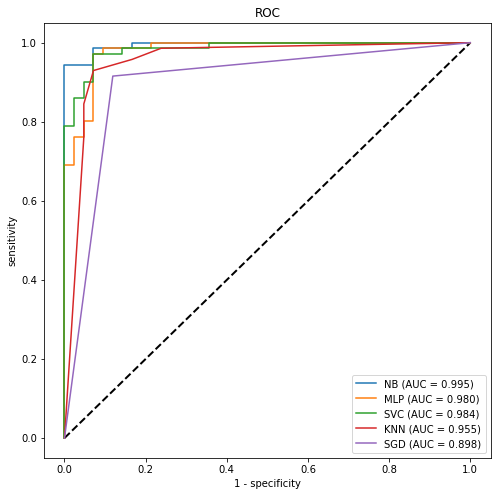

In [ ]:
import matplotlib.pyplot as plt

models = {
    'NB': GaussianNB(),
    'MLP': MLPClassifier(),
    'SVC': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'SGD': SGDClassifier(loss='log')
}

SKF = StratifiedKFold(n_splits=5)

figure(figsize=(8,8))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
xlabel('1 - specificity')
ylabel('sensitivity')
title('ROC')

for model in models.keys():
    for train_index, test_index in SKF.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        models[model].fit(X_train, y_train)
    
    y_pred = models[model].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)  
    plt.plot(fpr, tpr, label = model + ' (AUC = %0.3f)' % roc_auc)
    
plt.legend(loc='lower right')

#### Task 1 - multi-label classification
Repeat above tasks on the wine dataset obtained with `load_wine` method from `sklearn.datasets module`. Note that this set defines 3 different classes.

Use `sklearn.multiclass.OneVsRestClassifier` to apply previous classifiers to new data.

During calculating `ROC` curve and `AUC` values, use `sklearn.preprocessing.label_binarize` on reference and `ravel()` method on output matrices before drawing.

In [5]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.metrics import auc

data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


print('keys: ', data.keys())
print('\n')
print('feature names: ', list(data.feature_names))

pd.DataFrame(data.data, columns=data.feature_names).head()

print(data.data.shape)
print(data.target.shape)
print('\n')

print('Data array "data":')
print(data.data)
print('- shape: ', data.data.shape)
print('- elements: ', len(data.data))
print('- element length: ', len(data.data[0]))

print('\n')

print('Data array "target":')
print(data.target)
print('- klasy zbioru: ', np.unique(y))
print('- target names: ', list(data.target_names))
print('- shape: ', data.target.shape)
print('- elements: ', len(data.target))
print('- element length: 1')

keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178, 13)
(178,)


Data array "data":
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
- shape:  (178, 13)
- elements:  178
- element length:  13


Data array "target":
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1

NB :
- mean : 0.9607936507936508
- stdev:  0.014928231770859033


MLP :
- mean : 0.5009523809523809
- stdev:  0.08046734555820874


SVC :
- mean : 0.6857142857142857
- stdev:  0.03839580502197427


KNN :
- mean : 0.6915873015873016
- stdev:  0.07412800379979148


SGD :
- mean : 0.5331746031746032
- stdev:  0.09266429574393432




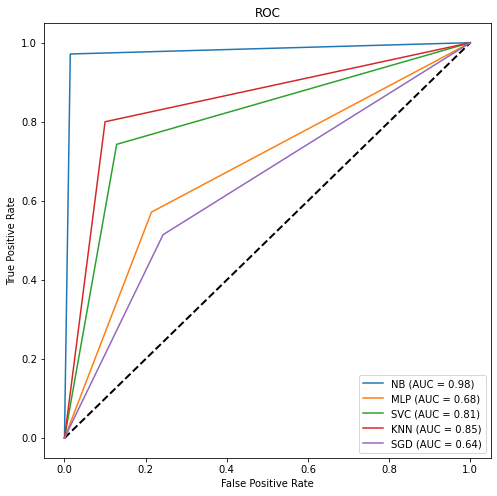

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

models = {
    'NB': GaussianNB(),
    'MLP': MLPClassifier(max_iter=3000),
    'SVC': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'SGD': SGDClassifier(loss='log')
}

accuracies = {
    'LR': [],
    'GP': [],
    'NB': [],
    'MLP': [],
    'SVC': [],
    'KNN': [],
    'SGD': []
}

SKF = StratifiedKFold(n_splits=5)
uniq_classes = np.unique(y)

figure(figsize=(8,8))
plot([0,1],[0,1],color='black',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

for model in models.keys():
    for train_index, test_index in SKF.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = OneVsRestClassifier(models[model])
        clf.fit(X_train, y_train)
        accuracies[model].append(clf.score(X_test,y_test))
    
    print(model,':')
    print('- mean :', mean(accuracies[model]))
    print('- stdev: ', stdev(accuracies[model]))
    print('\n')
    
    #For ROC curves we have to binarize lables
    y_pred = clf.predict(X_test)
    y_pred_bin = label_binarize(y_pred, classes=[0,1,2])
    y_test_bin = label_binarize(y_test, classes=[0,1,2])
    
    fpr, tpr, roc_auc = {}, {}, {}
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr["micro"], tpr["micro"], label=model + ' (AUC = {:0.2f})'.format(roc_auc["micro"]))
   
   
plt.legend(loc='lower right')

#### Task 2 - hyperparameter optimisation 
Use **double** `cross-validation` to find average effectiveness of the SVC classifier (on `load_breast_cancer` data) for the optimal `C` parameter.

The double `K-Fold` method should be used: 
- first we split our set into `train/test`,
- and then in each iteration we split train set into `train/dev` with another `cross-validation` loop. 

By train/dev division, we are looking for which parameter `C` gives the best result (let's assume that we test ~10 different values ​​evenly distributed from 0.2 to 2), and then we will use this optimal value to experiment on the test set.



In [6]:
my_list = list(range(2, 22, 2))
[i/10 for i in my_list]

[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [9]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statistics import mean,stdev


dataset = load_breast_cancer()
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.1, random_state=42, stratify=dataset['target'])

KF_outer = KFold(n_splits=5)
KF_inner = KFold(n_splits=5)
accuracies = []

my_list = list(range(2, 22, 2))
c_values = [i/10 for i in my_list] #[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0]
c_values.reverse()
best_c_arr = []

for outer_train_index, outer_test_index in KF_outer.split(X, y):
    X_train, X_test = X[outer_train_index], X[outer_test_index]
    y_train, y_test = y[outer_train_index], y[outer_test_index]
    
    for inner_train_index, inner_test_index in KF_inner.split(X_train, y_train):
        X_train_inner, X_test_inner = X_train[inner_train_index], X_train[inner_test_index]
        y_train_inner, y_test_inner = y_train[inner_train_index], y_train[inner_test_index]
        
        parameters_dict = {key: None for key in c_values}
        
        for c in c_values:
            svc = SVC(C=c)
            svc.fit(X_train_inner, y_train_inner)
            y_pred = svc.predict(X_test_inner)
            parameters_dict[c] = accuracy_score(y_test_inner, y_pred)
            
        best_c = max(parameters_dict, key=parameters_dict.get)
        
    svc = SVC(C=best_c)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    print('the best result: C={}, acc={:.3f}'.format(best_c, acc))
    
print('\n')
print('mean(accuracies): %.5f \nstdev(accuracies): %.3f' % (mean(accuracies), stdev(accuracies)))

the best result: C=2.0, acc=0.807
the best result: C=2.0, acc=0.895
the best result: C=2.0, acc=0.974
the best result: C=0.4, acc=0.947
the best result: C=1.2, acc=0.956


mean(accuracies): 0.91571 
stdev(accuracies): 0.067
